# Sentimental analysis of brand perception between Apple and Samsung.





Importing Required Libraries

In [140]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from imblearn.ensemble import BalancedBaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import balanced_accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from imblearn.ensemble import RUSBoostClassifier
from sklearn.metrics import classification_report, confusion_matrix

Loadind Data

In [112]:
iPhoneData = pd.read_csv('iPhone Data.csv')
SamsungData = pd.read_csv('Samsung Data.csv')

Exploratory Data Analysis (EDA)

In [113]:
iPhoneData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12973 entries, 0 to 12972
Data columns (total 59 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   iphone           12973 non-null  int64
 1   samsunggalaxy    12973 non-null  int64
 2   sonyxperia       12973 non-null  int64
 3   nokialumina      12973 non-null  int64
 4   htcphone         12973 non-null  int64
 5   ios              12973 non-null  int64
 6   googleandroid    12973 non-null  int64
 7   iphonecampos     12973 non-null  int64
 8   samsungcampos    12973 non-null  int64
 9   sonycampos       12973 non-null  int64
 10  nokiacampos      12973 non-null  int64
 11  htccampos        12973 non-null  int64
 12  iphonecamneg     12973 non-null  int64
 13  samsungcamneg    12973 non-null  int64
 14  sonycamneg       12973 non-null  int64
 15  nokiacamneg      12973 non-null  int64
 16  htccamneg        12973 non-null  int64
 17  iphonecamunc     12973 non-null  int64
 18  samsun

In [114]:
SamsungData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12973 entries, 0 to 12972
Data columns (total 59 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   iphone           12973 non-null  int64
 1   samsunggalaxy    12973 non-null  int64
 2   sonyxperia       12973 non-null  int64
 3   nokialumina      12973 non-null  int64
 4   htcphone         12973 non-null  int64
 5   ios              12973 non-null  int64
 6   googleandroid    12973 non-null  int64
 7   iphonecampos     12973 non-null  int64
 8   samsungcampos    12973 non-null  int64
 9   sonycampos       12973 non-null  int64
 10  nokiacampos      12973 non-null  int64
 11  htccampos        12973 non-null  int64
 12  iphonecamneg     12973 non-null  int64
 13  samsungcamneg    12973 non-null  int64
 14  sonycamneg       12973 non-null  int64
 15  nokiacamneg      12973 non-null  int64
 16  htccamneg        12973 non-null  int64
 17  iphonecamunc     12973 non-null  int64
 18  samsun

In [115]:
iPhoneData.head()

,iphone,samsunggalaxy,sonyxperia,nokialumina,htcphone,ios,googleandroid,iphonecampos,samsungcampos,sonycampos,...,sonyperunc,nokiaperunc,htcperunc,iosperpos,googleperpos,iosperneg,googleperneg,iosperunc,googleperunc,iphonesentiment
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [116]:
SamsungData.head()

,iphone,samsunggalaxy,sonyxperia,nokialumina,htcphone,ios,googleandroid,iphonecampos,samsungcampos,sonycampos,...,sonyperunc,nokiaperunc,htcperunc,iosperpos,googleperpos,iosperneg,googleperneg,iosperunc,googleperunc,galaxysentiment
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Checking Null Values

In [117]:
iPhoneData.isnull().sum()

iphone             0
samsunggalaxy      0
sonyxperia         0
nokialumina        0
htcphone           0
ios                0
googleandroid      0
iphonecampos       0
samsungcampos      0
sonycampos         0
nokiacampos        0
htccampos          0
iphonecamneg       0
samsungcamneg      0
sonycamneg         0
nokiacamneg        0
htccamneg          0
iphonecamunc       0
samsungcamunc      0
sonycamunc         0
nokiacamunc        0
htccamunc          0
iphonedispos       0
samsungdispos      0
sonydispos         0
nokiadispos        0
htcdispos          0
iphonedisneg       0
samsungdisneg      0
sonydisneg         0
nokiadisneg        0
htcdisneg          0
iphonedisunc       0
samsungdisunc      0
sonydisunc         0
nokiadisunc        0
htcdisunc          0
iphoneperpos       0
samsungperpos      0
sonyperpos         0
nokiaperpos        0
htcperpos          0
iphoneperneg       0
samsungperneg      0
sonyperneg         0
nokiaperneg        0
htcperneg          0
iphoneperunc 

In [118]:
SamsungData.isnull().sum()

iphone             0
samsunggalaxy      0
sonyxperia         0
nokialumina        0
htcphone           0
ios                0
googleandroid      0
iphonecampos       0
samsungcampos      0
sonycampos         0
nokiacampos        0
htccampos          0
iphonecamneg       0
samsungcamneg      0
sonycamneg         0
nokiacamneg        0
htccamneg          0
iphonecamunc       0
samsungcamunc      0
sonycamunc         0
nokiacamunc        0
htccamunc          0
iphonedispos       0
samsungdispos      0
sonydispos         0
nokiadispos        0
htcdispos          0
iphonedisneg       0
samsungdisneg      0
sonydisneg         0
nokiadisneg        0
htcdisneg          0
iphonedisunc       0
samsungdisunc      0
sonydisunc         0
nokiadisunc        0
htcdisunc          0
iphoneperpos       0
samsungperpos      0
sonyperpos         0
nokiaperpos        0
htcperpos          0
iphoneperneg       0
samsungperneg      0
sonyperneg         0
nokiaperneg        0
htcperneg          0
iphoneperunc 

Statistical Analysis

In [119]:
iPhoneData.describe()

,iphone,samsunggalaxy,sonyxperia,nokialumina,htcphone,ios,googleandroid,iphonecampos,samsungcampos,sonycampos,...,sonyperunc,nokiaperunc,htcperunc,iosperpos,googleperpos,iosperneg,googleperneg,iosperunc,googleperunc,iphonesentiment
count,12973.000000,12973.000000,12973.000000,12973.000000,12973.000000,12973.000000,12973.000000,12973.000000,12973.000000,12973.000000,...,12973.000000,12973.000000,12973.000000,12973.000000,12973.000000,12973.000000,12973.000000,12973.000000,12973.000000,12973.000000
mean,2.148077,0.071148,0.024050,0.002312,0.137131,0.152316,0.039621,0.289601,0.053727,0.009944,...,0.002312,0.005550,0.064133,0.059200,0.038542,0.057581,0.058198,0.033069,0.016110,3.724505
std,5.664226,0.280869,0.171266,0.051144,4.223547,0.839081,0.255020,2.188978,0.711322,0.163251,...,0.086887,0.183249,0.829639,0.550736,0.426599,0.565341,0.586035,0.313733,0.285808,1.851348
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000
75%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000
max,46.000000,8.000000,8.000000,2.000000,479.000000,6.000000,6.000000,156.000000,65.000000,8.000000,...,5.000000,13.000000,59.000000,26.000000,24.000000,20.000000,25.000000,10.000000,24.000000,5.000000


In [120]:
SamsungData.describe()

,iphone,samsunggalaxy,sonyxperia,nokialumina,htcphone,ios,googleandroid,iphonecampos,samsungcampos,sonycampos,...,sonyperunc,nokiaperunc,htcperunc,iosperpos,googleperpos,iosperneg,googleperneg,iosperunc,googleperunc,galaxysentiment
count,12973.000000,12973.000000,12973.000000,12973.000000,12973.000000,12973.000000,12973.000000,12973.000000,12973.000000,12973.000000,...,12973.000000,12973.000000,12973.000000,12973.000000,12973.000000,12973.000000,12973.000000,12973.000000,12973.000000,12973.000000
mean,2.148077,0.071148,0.024050,0.002312,0.137131,0.152316,0.039621,0.289601,0.053727,0.009944,...,0.002312,0.005550,0.064133,0.059200,0.038542,0.057581,0.058198,0.033069,0.016110,3.824327
std,5.664226,0.280869,0.171266,0.051144,4.223547,0.839081,0.255020,2.188978,0.711322,0.163251,...,0.086887,0.183249,0.829639,0.550736,0.426599,0.565341,0.586035,0.313733,0.285808,1.781302
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000
75%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000
max,46.000000,8.000000,8.000000,2.000000,479.000000,6.000000,6.000000,156.000000,65.000000,8.000000,...,5.000000,13.000000,59.000000,26.000000,24.000000,20.000000,25.000000,10.000000,24.000000,5.000000


Converting Dataframes

In [121]:
YSamsung = SamsungData['galaxysentiment'].values
XSamsung = SamsungData.drop('galaxysentiment',axis=1).values

YiPhone = iPhoneData['iphonesentiment'].values
XiPhone = iPhoneData.drop('iphonesentiment',axis=1).values

In [122]:
#to display dimensions
print("y : {}".format(YSamsung.shape))
print("X : {}".format(XSamsung.shape))

y : (12973,)
X : (12973, 58)


In [123]:
# Reshaping X and y for both Samsung and iPhone data
YSamsung = YSamsung.reshape(-1, 1)
YiPhone = YiPhone.reshape(-1, 1)
print("y of Samsung after reshaping: {}".format(YSamsung.shape))
print("X  of Samsung after reshaping: {}".format(XSamsung.shape))

print("\niPhone Y after reshaping: {}".format(YiPhone.shape))
print("iPhone X after reshaping: {}".format(XiPhone.shape))

y of Samsung after reshaping: (12973, 1)
X  of Samsung after reshaping: (12973, 58)

iPhone Y after reshaping: (12973, 1)
iPhone X after reshaping: (12973, 58)


Splitting data for Training and Testing Purposes

In [124]:
SamsungXtrain, SamsungXtest, SamsungYtrain, SamsungYtest = train_test_split(XSamsung, YSamsung, stratify=YSamsung, test_size=0.3, random_state=42)

In [125]:
X = SamsungData.iloc[:,0:58]
y = SamsungData.iloc[:,-1]

#for extracting top best features based on chi2
Features = SelectKBest(score_func=chi2, k=15)
fit = Features.fit(X,y)

In [126]:
DFScore = pd.DataFrame(fit.scores_)
DFColumn = pd.DataFrame(X.columns)

FScore = pd.concat([DFColumn,DFScore],axis=1)
FScore.columns = ['Specifications','Score']

#to print top best features
print(FScore.nlargest(10,'Score'))

   Specifications         Score
0          iphone  28329.784605
17   iphonecamunc  10883.576075
32   iphonedisunc   8808.523543
5             ios   8644.241528
26      htcdispos   8555.754039
27   iphonedisneg   7111.885621
4        htcphone   7088.170837
41      htcperpos   6808.397768
11      htccampos   6604.927397
46      htcperneg   6110.308144


Defining Thresholds

In [127]:
Cres = iPhoneData.iloc[:,0:58]
Thr = VarianceThreshold(threshold=0.2)
NewCRes=Thr.fit_transform(Cres)
NewCRes.shape

(12973, 32)

Classification

In [128]:
XSamsung = SamsungData.iloc[:,0:58]
YSamsung = SamsungData.iloc[:,-1]
MutualInformation = mutual_info_classif(XSamsung, YSamsung, n_neighbors=5, copy=True, random_state=None)

FS = pd.DataFrame(MutualInformation)
Col = pd.DataFrame(XSamsung.columns)

#concat dataframes
FeatureScores = pd.concat([Col,FS],axis=1)
FeatureScores.columns = ['Specification','Score']
FeatureScores.nlargest(10,'Score')

,Specification,Score
1,samsunggalaxy,0.080069
12,iphonecamneg,0.073533
27,iphonedisneg,0.059860
32,iphonedisunc,0.054733
5,ios,0.049991
6,googleandroid,0.045045
17,iphonecamunc,0.043138
46,htcperneg,0.042762
31,htcdisneg,0.042608
0,iphone,0.042252


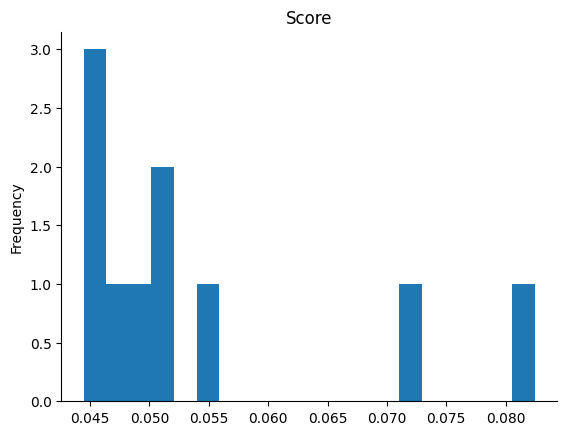

In [129]:
_df_0['Score'].plot(kind='hist', bins=20, title='Score')
plt.gca().spines[['top', 'right',]].set_visible(False)

Feature Selection

In [130]:
LogisModel = LogisticRegression()
randFError = RFE(estimator=LogisModel, n_features_to_select=15)
fit = randFError.fit(XiPhone, YiPhone)

print("Features of the model are:{}".format(fit.n_features_))
print("Selected Features of the model:{}".format(fit.support_))
print("Feature Ranking are:{}".format(fit.ranking_))

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel

Features of the model are:15
Selected Features of the model:[ True  True  True  True  True False  True False False False False False
 False  True  True False  True False  True False False  True False False
 False False False False False False False False False False False False
 False False  True False False False False False False False False False
 False  True False False False  True False  True False False]
Feature Ranking are:[ 1  1  1  1  1  4  1 38  9 12 17 11 20  1  1 30  1 35  1  5 43  1 39  7
 25 18 13 40 15 26 31 21 41  6 24 42 10 36  1  3 27 23 37 44  2 19 22 28
  8  1 29 16 32  1 33  1 34 14]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [131]:
PhoneDataFeatures = ['htcperneg', 'nokiaperunc', 'sonycamunc', 'iphonecampos', 'ios', 'sonydisunc', 'googleperunc', 'samsungcamneg', 'nokiadisneg', 'samsungdisunc', 'googleandroid', 'sonycampos', 'iphoneperunc', 'htcdispos', 'sonyperpos', 'htcperunc', 'iphoneperneg', 'samsungdisneg', 'htccampos', 'iphonedisunc', 'googleperpos', 'samsungperunc', 'sonyperneg', 'sonyxperia', 'samsungperpos', 'iphonedispos', 'samsunggalaxy', 'htcphone', 'sonyperunc', 'iosperunc', 'htcdisneg', 'nokiadisunc', 'sonycamneg', 'iosperpos', 'samsungcampos', 'iosperneg', 'iphonecamneg', 'nokiaperpos', 'htccamunc', 'nokiadispos', 'sonydisneg', 'htcperpos', 'samsungcamunc', 'iphonedisneg', 'htccamneg', 'nokiacamunc', 'iphonedispos', 'htcdisunc', 'samsungperneg', 'iphonecamunc', 'iosperneg', 'googleperneg', 'samsungdispos', 'googleperpos', 'nokiaperneg', 'iphonedisneg']

Model's Implementation

In [132]:
XSamsung = SamsungData.loc[:, PhoneDataFeatures].values
YSamsung = SamsungData.loc[:,['galaxysentiment']].values
XSamsung = StandardScaler().fit_transform(XSamsung)

In [133]:
PCAnalysis = PCA(n_components=15)
PCAnalysis.fit(XSamsung)
print(PCAnalysis.explained_variance_)
print(PCAnalysis.components_)

XPCAnalysis = PCAnalysis.transform(XSamsung)
print("\noriginal :   ", XSamsung.shape)
print("After transformation:", XPCAnalysis.shape)

[12.63675231  6.40591293  5.32439013  4.36163185  3.99717236  3.30852055
  2.48859979  1.9602315   1.91670232  1.76776659  1.46711604  1.20180712
  1.16286549  0.94420853  0.64389724]
[[ 2.08924002e-01  3.32813041e-02  3.41297562e-02  6.57528446e-02
   7.63619112e-03  3.42578691e-02  2.13172170e-01  2.05241031e-01
   3.30763041e-02  2.09351045e-01  1.60122897e-01  2.47365787e-02
   1.09263606e-01  4.73345869e-02  2.29945374e-02  1.37466242e-01
   1.35761527e-01  2.54335997e-01  8.46704870e-02  8.96037899e-02
   2.38310443e-01  2.16089017e-01  1.51784503e-02  8.45541742e-03
   1.90184977e-01  1.00389308e-01  8.32922574e-02  1.20111248e-02
   3.06760279e-02  2.58369610e-02  2.25770091e-01  3.62347188e-02
   3.28971093e-02  3.45701243e-02  1.43922324e-01  3.07373816e-02
   1.37591718e-01  3.00849993e-02  1.15670993e-01  3.57659390e-02
   1.04569301e-02  1.53636184e-01  1.82096765e-01  1.11122100e-01
   1.86498968e-01  3.30467094e-02  1.00389308e-01  1.80879438e-01
   2.45839737e-01  4.973

Balanced Bagging Classifier Implementation

In [134]:
yPred = BalancedBaggingClassifier(base_estimator=DecisionTreeClassifier(),
                                 sampling_strategy='auto',
                                 replacement=False,
                                 random_state=42).fit(XPCAnalysis, YSamsung).predict(XPCAnalysis)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_bagging.py:802: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/imblearn/ensemble/_bagging.py:353: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  warnings.warn(


In [135]:
# Training the model
BalBagClassi = BalancedBaggingClassifier(base_estimator=DecisionTreeClassifier(), sampling_strategy='auto', replacement=False, random_state=0)
BalBagClassi.fit(SamsungXtrain, SamsungYtrain)

# for making predictions
yPred = BalBagClassi.predict(SamsungXtest)

# computing balanced accuracy score
balanced_accuracy_score(SamsungYtest, yPred)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_bagging.py:802: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/imblearn/ensemble/_bagging.py:353: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  warnings.warn(


0.47247769790615735

RUSBoost Classifier Implementation

In [141]:
# Training the model
rusboost = RUSBoostClassifier(n_estimators=200, algorithm='SAMME.R', random_state=0)
rusboost.fit(SamsungXtrain, SamsungYtrain.ravel())

# Making predictions
y_pred = rusboost.predict(SamsungXtest)

# printing balanced accuracy score
print(balanced_accuracy_score(SamsungYtest, y_pred))

0.30184295938514705


Random Forest Classifier Implementation

In [143]:
rf = RandomForestClassifier(max_depth=20, max_features=5)
rf.fit(SamsungXtrain, SamsungYtrain.ravel())
rfpredG = rf.predict(SamsungXtest)

# printing the results
print(classification_report(SamsungYtest, rfpredG))

              precision    recall  f1-score   support

           0       0.96      0.78      0.86       511
           1       0.00      0.00      0.00       117
           2       0.84      0.12      0.21       136
           3       0.97      0.64      0.77       356
           4       0.94      0.31      0.47       432
           5       0.76      0.99      0.86      2340

    accuracy                           0.80      3892
   macro avg       0.74      0.47      0.53      3892
weighted avg       0.80      0.80      0.76      3892



Confusion Matrix

[[ 400    1    1    4    6    4]
 [   0    0    0    0    1    0]
 [   0    0   16    0    0    3]
 [   0    0    1  228    2    4]
 [   3    1    0    2  136    3]
 [ 108  115  118  122  287 2326]]


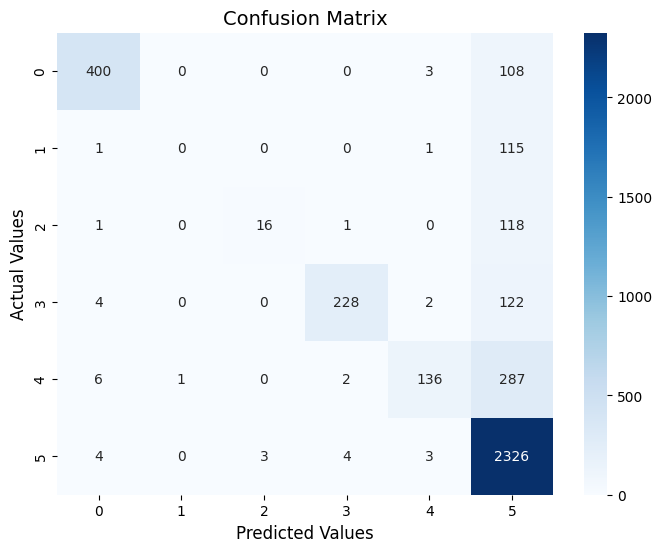

In [146]:
print(confusion_matrix(rfpredG, SamsungYtest))
CorMAx = confusion_matrix(SamsungYtest, rfpredG)
fig, ax = plt.subplots(figsize=(8, 6))

sns.heatmap(CorMAx, annot=True, fmt="d", cmap="Blues", ax=ax)
ax.set_xlabel("Predicted Values", fontsize=12)
ax.set_ylabel("Actual Values", fontsize=12)
ax.set_title("Confusion Matrix", fontsize=14)

# to Show plot
plt.show()

Visualisation

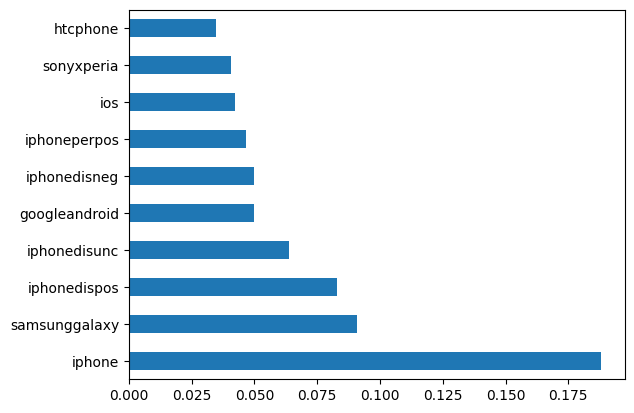

In [137]:
XtreeClassi = ExtraTreesClassifier()
XtreeClassi.fit(X,y)

Importances = pd.Series(XtreeClassi.feature_importances_, index=X.columns)
Importances.nlargest(10).plot(kind='barh')
plt.show()

Plotting Accuracy

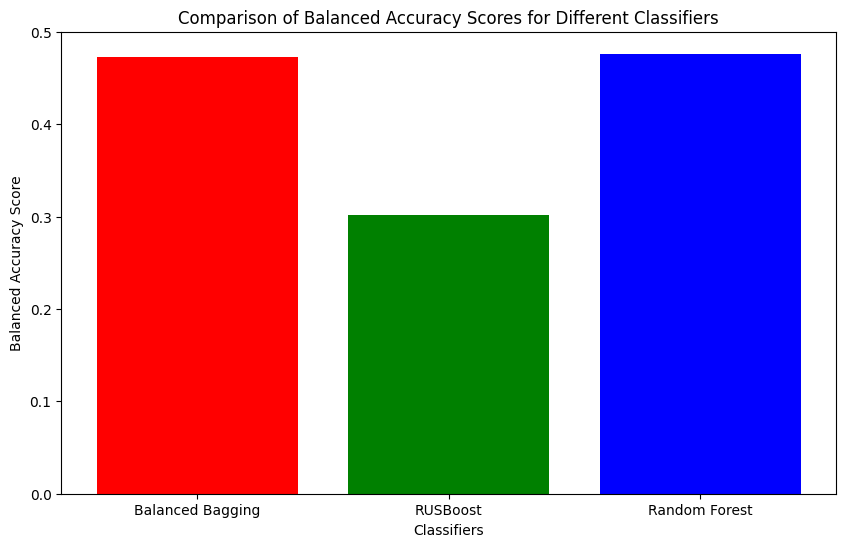

In [138]:
labels = ['Balanced Bagging', 'RUSBoost', 'Random Forest']
accuracy_scores = [balanced_accuracy_score(SamsungYtest, yPred), balanced_accuracy_score(SamsungYtest, y_pred), balanced_accuracy_score(SamsungYtest, rfpredG)]

plt.figure(figsize=(10, 6))
plt.bar(labels, accuracy_scores, color=['red', 'green', 'blue'])
plt.xlabel('Classifiers')
plt.ylabel('Balanced Accuracy Score')
plt.title('Comparison of Balanced Accuracy Scores for Different Classifiers')
plt.show()
